# Medical Expenditure Panel Survey



- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Loading libraries and retrieving data</a>
- <a href='#3'>3. Exploratory data analysis</a>
- <a href='#4'>4. Data Visualization</a>
- <a href='#5'>5. Model</a>


# <a id='1'>1. Introduction</a>


The Medical Expenditure Panel Survey (MEPS), began in 1996, is a set of large-scale surveys of families and individuals, their medical providers (doctors, hospitals, pharmacies, etc.), and employers across the United States. The MEPS Household Component (MEPS-HC) survey collects information from families and individuals pertaining to medical expenditures, conditions, and events; demographics (e.g., age, ethnicity, and income); health insurance coverage; access to care; health status; and jobs held. Each surveyed household is interviewed five times (rounds) over a two-year period:

### Objective

Rapid increases in health care costs continue to concern the public, federal and state agencies, and private industry. Publicly funded insurance programs such as Medicare and Medicaid are continually faced with difficult decisions in allocating health care dollars. Private industries are similarly challenged in providing health care benefits to their employees. Expenditures on health care now account for 16 percent of the U.S. gross national product.Given the high and growing cost of health care in the U.S, the need to contain health care costs forces us to consider which interventions produce the greatest value. Using MEPS survey we will try to identify potential correlation between different features.


### Dataset

The file contains the following variables:
1. Unique person identifiers and survey administration variables
2. Geographic variables
3. Demographic variables
4. Income and tax filing variables
5. Employment variables
6. Health insurance variables
7. Disability days indicators
8. Access to care variables
9. Health status variables
10. Utilization, expenditure, and source of payment variables
11. Weight and variance estimation variables


# <a id='2'>2. Loading libraries and retrieving data</a>

In [1]:
#Importing the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
%matplotlib inline

import xport #data import
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 1999

In [2]:
codebook = pd.read_excel('Codebook.xlsx')

In [3]:
codebook.head(10)

,Name,Start,End,Description
0,ACCELI42,1122.0,1123.0,PERS ELIGIBLE FOR ACCESS SUPPLEMENT-R4/2
1,ACTDTY31,237.0,238.0,MILITARY FULL-TIME ACTIVE DUTY - R3/1
2,ACTDTY42,239.0,240.0,MILITARY FULL-TIME ACTIVE DUTY - R4/2
3,ACTDTY53,241.0,242.0,MILITARY FULL-TIME ACTIVE DUTY - R5/3
4,ACTLIM31,463.0,464.0,ANY LIMITATION WORK/HOUSEWRK/SCHL-RD 3/1
5,ACTLIM53,465.0,466.0,ANY LIMITATION WORK/HOUSEWRK/SCHL-RD 5/3
6,ADAPPT42,714.0,715.0,SAQ 12 MOS: # VISITS TO MED OFF FOR CARE
7,ADCAPE42,766.0,767.0,SAQ 4WKS: FELT CALM/PEACEFUL SF-12V2
8,ADCLIM42,754.0,755.0,SAQ: HLTH LIMITS CLIMBING STAIRS SF-12V2
9,ADCMPM42,814.0,815.0,SAQ: DATE COMPLETED - MONTH


In [4]:
codebook.shape

(1946, 4)

From the MEPS Documentation, we know that Codebook describes an ASCII data set and provides the following programming identifiers for each variable:

- Name: Variable name (maximum of 8 characters)
- Start: Beginning column position of variable in record
- End: Ending column position of variable in record
- Description:  Variable descriptor (maximum 40 characters)


In [5]:
#Importing the dataset

with open('h192.ssp', 'rb') as f:
    data = xport.to_dataframe(f)

data.shape

(34655, 1941)

#  <a href='#3'>3. Exploratory data analysis</a>

In [6]:
data.head() #check the data

DUID    PID  DUPERSID  PANEL FAMID31 FAMID42 FAMID53 FAMID16 FAMIDYR  \
0  10001.0  101.0  10001101   21.0       A       A       A       A       A   
1  10001.0  102.0  10001102   21.0       A       A       A       A       A   
2  10001.0  103.0  10001103   21.0       A       A       A       A       A   
3  10001.0  104.0  10001104   21.0       A       A       A       A       A   
4  10002.0  101.0  10002101   21.0       A       A       A       A       A   

  CPSFAMID  FCSZ1231  FCRP1231 RULETR31 RULETR42 RULETR53 RULETR16  RUSIZE31  \
0        A       4.0       1.0        A        A        A        A       4.0   
1        A       4.0       0.0        A        A        A        A       4.0   
2        A       4.0       0.0        A        A        A        A       4.0   
3        A       4.0       0.0        A        A        A        A       4.0   
4        A       2.0       1.0        A        A        A        A       2.0   

   RUSIZE42  RUSIZE53  RUSIZE16  RUCLAS31  RUCLAS42  RUCLAS53  RUCLAS16  \
0       4.0       4.0       4.0       1.0       1.0       1.0       1.0   
1       4.0       4.0       4.0       1.0       1.0       1.0       1.0   
2       4.0       4.0       4.0       1.0       1.0       1.0       1.0   
3       4.0       4.0       4.0       1.0       1.0       1.0       1.0   
4       2.0       2.0       2.0       1.0       1.0       1.0       1.0   

   FAMSZE31  FAMSZE42  FAMSZE53  FAMSZE16  FMRS1231  FAMS1231  FAMSZEYR  \
0       4.0       4.0       4.0       4.0       1.0       4.0       4.0   
1       4.0       4.0       4.0       4.0       1.0       4.0       4.0   
2       4.0       4.0       4.0       4.0       1.0       4.0       4.0   
3       4.0       4.0       4.0       4.0       1.0       4.0       4.0   
4       2.0       2.0       2.0       2.0       1.0       2.0       2.0   

   FAMRFPYR  REGION31  REGION42  REGION53  REGION16  REFPRS31  REFPRS42  \
0       1.0       1.0       1.0       1.0       1.0     101.0     101.0   
1       0.0       1.0       1.0       1.0       1.0     101.0     101.0   
2       0.0       1.0       1.0       1.0       1.0     101.0     101.0   
3       0.0       1.0       1.0       1.0       1.0     101.0     101.0   
4       1.0       1.0       1.0       1.0       1.0     101.0     101.0   

   REFPRS53  REFPRS16  RESP31  RESP42  RESP53  RESP16  PROXY31  PROXY42  \
0     101.0     101.0     1.0     1.0     1.0     1.0      1.0      1.0   
1     101.0     101.0     2.0     2.0     2.0     2.0      1.0      1.0   
2     101.0     101.0     2.0     2.0     2.0     2.0      1.0      1.0   
3     101.0     101.0     2.0     2.0     2.0     2.0      1.0      1.0   
4     101.0     101.0     1.0     1.0     1.0     1.0      1.0      1.0   

   PROXY53  PROXY16  INTVLANG  BEGRFM31  BEGRFY31  ENDRFM31  ENDRFY31  \
0      1.0      1.0       1.0       1.0    2016.0       5.0    2016.0   
1      1.0      1.0       1.0       1.0    2016.0       5.0    2016.0   
2      1.0      1.0       1.0       1.0    2016.0       5.0    2016.0   
3      1.0      1.0       1.0       1.0    2016.0       5.0    2016.0   
4      1.0      1.0       1.0       1.0    2016.0       2.0    2016.0   

   BEGRFM42  BEGRFY42  ENDRFM42  ENDRFY42  BEGRFM53  BEGRFY53  ENDRFM53  \
0       5.0    2016.0       8.0    2016.0       8.0    2016.0       3.0   
1       5.0    2016.0       8.0    2016.0       8.0    2016.0       3.0   
2       5.0    2016.0       8.0    2016.0       8.0    2016.0       3.0   
3       5.0    2016.0       8.0    2016.0       8.0    2016.0       3.0   
4       2.0    2016.0       8.0    2016.0       8.0    2016.0       3.0   

   ENDRFY53  ENDRFM16  ENDRFY16  KEYNESS  INSCOP31  INSCOP42  INSCOP53  \
0    2017.0      12.0    2016.0      1.0       1.0       1.0       1.0   
1    2017.0      12.0    2016.0      1.0       1.0       1.0       1.0   
2    2017.0      12.0    2016.0      1.0       1.0       1.0       1.0   
3    2017.0      12.0    2016.0      1.0       1.0       1.0      

In [7]:
data.describe()  #data description

DUID           PID         PANEL      FCSZ1231      FCRP1231  \
count  34655.000000  34655.000000  34655.000000  34655.000000  34655.000000   
mean   45525.417285    105.458202     20.492050      3.028336      0.412870   
std    30326.559333     21.254609      0.499944      1.921049      0.515883   
min    10001.000000    101.000000     20.000000     -1.000000     -1.000000   
25%    14940.500000    101.000000     20.000000      2.000000      0.000000   
50%    70172.000000    102.000000     20.000000      3.000000      0.000000   
75%    75346.000000    103.000000     21.000000      4.000000      1.000000   
max    80570.000000    701.000000     21.000000     10.000000      1.000000   

           RUSIZE31      RUSIZE42      RUSIZE53      RUSIZE16      RUCLAS31  \
count  34655.000000  34655.000000  34655.000000  34655.000000  34655.000000   
mean       3.293176      3.343731      3.363642      3.358707      0.971462   
std        1.881797      1.822421      1.782168      1.782189      0.385082   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        2.000000      2.000000      2.000000      2.000000      1.000000   
50%        3.000000      3.000000      3.000000      3.000000      1.000000   
75%        4.000000      4.000000      4.000000      4.000000      1.000000   
max       13.000000     13.000000     14.000000     14.000000      3.000000   

           RUCLAS42      RUCLAS53      RUCLAS16      FAMSZE31      FAMSZE42  \
count  34655.000000  34655.000000  34655.000000  34655.000000  34655.000000   
mean       0.992267      1.004213      1.018121      3.321599      3.374376   
std        0.298122      0.237784      0.168561      1.884612      1.824378   
min       -1.000000     -1.000000      1.000000     -1.000000     -1.000000   
25%        1.000000      1.000000      1.000000      2.000000      2.000000   
50%        1.000000      1.000000      1.000000      3.000000      3.000000   
75%        1.000000      1.000000      1.000000      5.000000      5.000000   
max        3.000000      3.000000      3.000000     13.000000     13.000000   

           FAMSZE53      FAMSZE16      FMRS1231      FAMS1231      FAMSZEYR  \
count  34655.000000  34655.000000  34655.000000  34655.000000  34655.000000   
mean       3.391343      3.385976      0.942202      3.200837      3.431395   
std        1.782502      1.782393      0.289144      1.906196      1.752462   
min       -1.000000     -1.000000     -1.000000     -1.000000      1.000000   
25%        2.000000      2.000000      1.000000      2.000000      2.000000   
50%        3.000000      3.000000      1.000000      3.000000      3.000000   
75%        5.000000      5.000000      1.000000      4.000000      5.000000   
max       14.000000     14.000000      1.000000     11.000000     14.000000   

           FAMRFPYR      REGION31      REGION42      REGION53      REGION16  \
count  34655.000000  34655.000000  34655.000000  34655.000000  34655.000000   
mean       0.404819      2.657971      2.708469      2.734901      2.734901   
std        0.490864      1.181841      1.106021      1.063564      1.063564   
min        0.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.000000      2.000000      2.000000      2.000000      2.000000   
50%        0.000000      3.000000      3.000000      3.000000      3.000000   
75%        1.000000      4.000000      4.000000      4.000000      4.000000   
max        1.000000      4.000000      4.000000      4.000000      4.000000   

           REFPRS31      REFPRS42      REFPRS53      REFPRS16        RESP31  \
count  34655.000000  34655.000000  34655.000000  34655.000000  34655.000000   
mean     100.189554    101.755245    102.657712    103.352215      1.544828   
std       23.816345     21.149870     19.587214     17.655390      0.551291   
min       -1.000000     -1.000000     -1.000000    101.000000      0.000000   
25%      101.000000    101.000000    101.000000    101.00000

In [8]:
data.columns.values

array(['DUID', 'PID', 'DUPERSID', ..., 'CSAQW16F', 'VARSTR', 'VARPSU'], dtype=object)

In [9]:
#Let's check if there is any missing data
data.isnull().values.any()

False

We do not have any missing values


### Priority Condition Variables


Let's start with Priority Condition variable as this section was asked in its entirety in Round 1 for all current or institutionalized persons, and in Rounds 2 and 4 for only new RU members. In Rounds 3 and 5, the specific condition questions (except joint pain and chronic bronchitis) were asked only if the person had not reported the condition in a previous round; the joint pain and chronic bronchitis questions were asked in Rounds 3 and 5 for all current or institutionalized persons aged 18 or older, regardless of Round 1, Round 2, and Round 4 responses.

Priority Conditions includes: 

1. High blood pressure, including multiple diagnoses
2. Heart disease (including coronary heart disease, angina, myocardial infarction, and other unspecified heart disease)
3. Stroke
4. Emphysema
5. Chronic bronchitis
6. High cholesterol
7. Cancer
8. Diabetes
9. Joint pain
10. Arthritis
11. Asthma
12. Attention Deficit Hyperactivity Disorder/Attention Deficit Disorder (ADHD/ADD)

Before we jump into Priority conditions, lets take a moment to check Male/Female ratio in the dataset

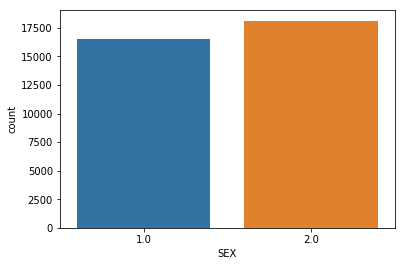

In [10]:
sns.countplot(data.SEX)

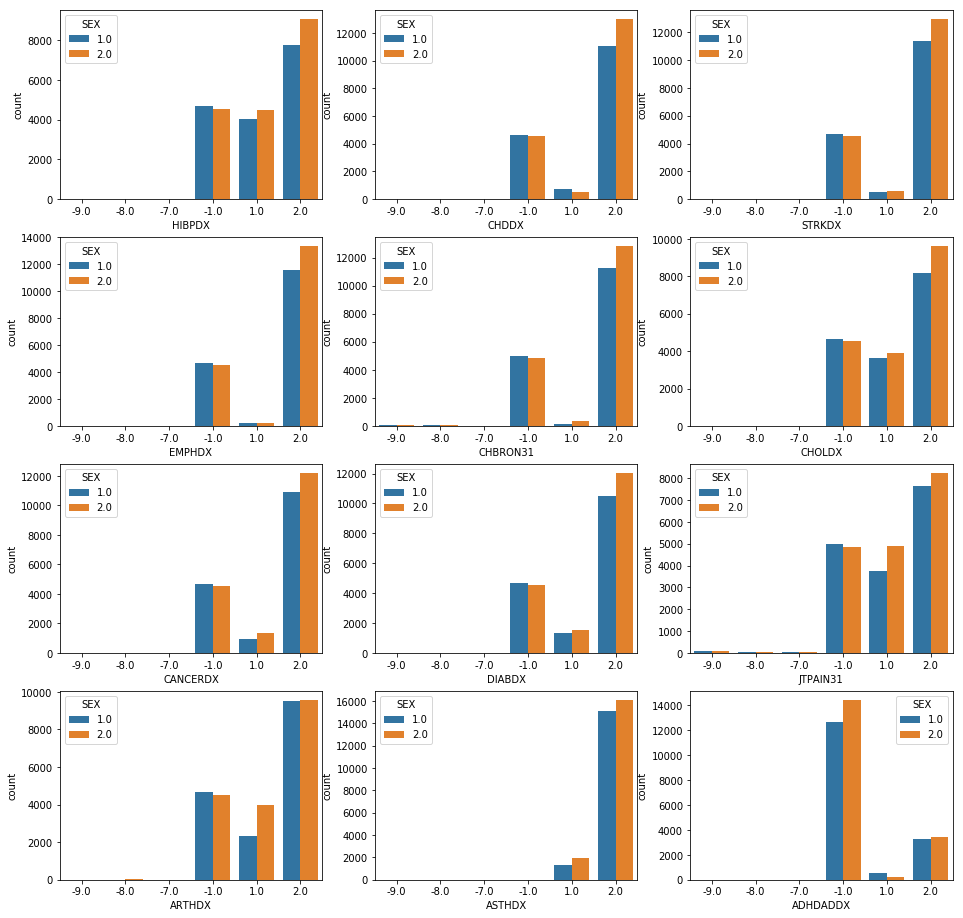

In [11]:
fig, ax = plt.subplots(4,3, figsize=(16,16))
sns.countplot(data.HIBPDX, hue= data.SEX, ax=ax[0,0]) #High Blood Pressure
sns.countplot(data.CHDDX,hue= data.SEX,  ax=ax[0,1])  #Heart Disease
sns.countplot(data.STRKDX,hue= data.SEX, ax=ax[0,2]) #Stroke
sns.countplot(data.EMPHDX, hue= data.SEX, ax=ax[1,0]) #Emphysema
sns.countplot(data.CHBRON31, hue= data.SEX, ax=ax[1,1]) # Chronic Bronchitis
sns.countplot(data.CHOLDX,hue= data.SEX, ax=ax[1,2]) # High Cholestrol
sns.countplot(data.CANCERDX, hue= data.SEX, ax=ax[2,0]) #Cancer
sns.countplot(data.DIABDX,hue= data.SEX, ax=ax[2,1]) #DIABDX
sns.countplot(data.JTPAIN31,hue= data.SEX, ax=ax[2,2]) #Joint Pain
sns.countplot(data.ARTHDX,hue= data.SEX, ax=ax[3,0]) #Arthritis
sns.countplot(data.ASTHDX,hue= data.SEX, ax=ax[3,1]) #Asthma
sns.countplot(data.ADHDADDX,hue= data.SEX, ax=ax[3,2]) #ADHD/ADD
#plt.title('Priority Conditions', fontsize = 18)

- There are more women in our datasets and that reflects in with some of the Priority conditions like High Blood pressure, Stroke, Chronic Bronchitis and Cholestrol. However, we also notice that there is significant increase in women diagonised with Arthiritis, Cancer (probably due Breast cancer cases in our dataset "CABREAST"), Joint Pain,  and Asthama

- Men are  more diagnosed with ADHD/ADD



Let's drop some columns for now to visualize the data

In [12]:
df  = data[['DUPERSID','SEX', 'RACEV2X', 'PERWT16F', 'AGE16X', 'HPRJA16', 'TOTEXP16', 'REGION16' ]]

In [13]:
df.columns

Index(['DUPERSID', 'SEX', 'RACEV2X', 'PERWT16F', 'AGE16X', 'HPRJA16',
       'TOTEXP16', 'REGION16'],
      dtype='object')

### Correlation between features

Before we do further data visualization, let's check for correlation between features. 

In Statistics, Correlation is used to test relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related. 

Some examples of data that have a high correlation:

- Your caloric intake and your weight.
- Your eye color and your relatives’ eye colors.
- The amount of time your study and your GPA.


Some examples of data that have a low correlation (or none at all):

- Your sexual preference and the type of cereal you eat.
- A dog’s name and the type of dog biscuit they prefer.
- The cost of a car wash and how long it takes to buy a soda inside the station.


Correlations are useful because if we can find out what relationship variables have, we can make predictions about future behavior. Knowing what the future holds is very important in the social sciences like MEPS survey data 

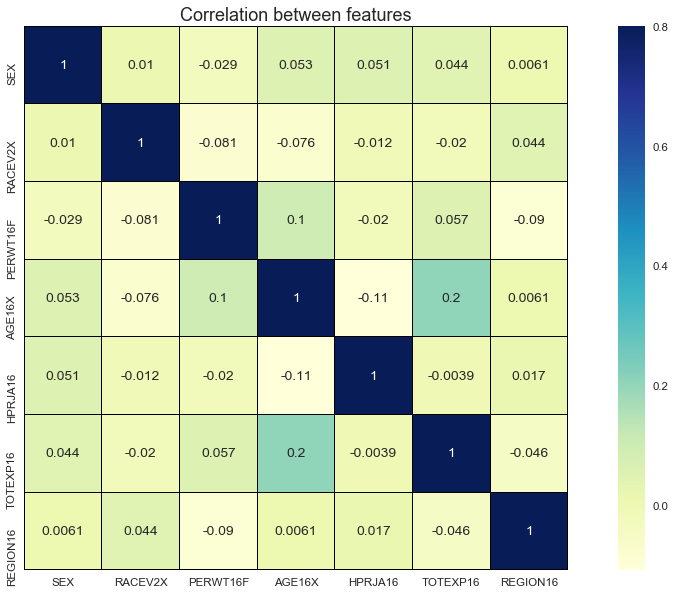

In [14]:
corr=df.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(18, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features', fontsize=18);

In [15]:
# Let's do bit of feature engineering 

#Convert to Float to Int

#df['RACEV2X'].dtype
df.RACEV2X = df.RACEV2X.astype(int)
df.SEX = df.SEX.astype(int)
df.REGION16 = df.REGION16.astype(int)
df.PERWT16F = df.TOTEXP16.astype(int)

In [16]:
#Convert Int to Str

df.PERWT16F = df.TOTEXP16.astype(str)
df.RACEV2X = df.RACEV2X.astype(str)
df.SEX = df.SEX.astype(str)
df.REGION16 = df.REGION16.astype(str)

In [17]:
#Rename Sex

df['SEX'] = df['SEX'].replace({'1':'Male'})
df['SEX'] = df['SEX'].replace({'2':'Female'})

#Rename Race

df['RACEV2X'] = df['RACEV2X'].replace({'1':'White'})
df['RACEV2X'] = df['RACEV2X'].replace({'2':'Black'})
df['RACEV2X'] = df['RACEV2X'].replace({'3':'AMER INDIAN/ALASKA NATIVE'})
df['RACEV2X'] = df['RACEV2X'].replace({'4':'ASIAN INDIAN'})
df['RACEV2X'] = df['RACEV2X'].replace({'5':'CHINESE'})
df['RACEV2X'] = df['RACEV2X'].replace({'6':'FILIPINO'})
df['RACEV2X'] = df['RACEV2X'].replace({'10':'OTH ASIAN/NATV HAWAIIAN/PACFC ISL'})
df['RACEV2X'] = df['RACEV2X'].replace({'12':'MULTIPLE RACES REPORTED'})


# Rename Region

df['REGION16'] = df['REGION16'].replace({'-1':'INAPPLICABLE'})
df['REGION16'] = df['REGION16'].replace({'1':'NORTHEAST'})
df['REGION16'] = df['REGION16'].replace({'2':'MIDWEST'})
df['REGION16'] = df['REGION16'].replace({'3':'SOUTH'})
df['REGION16'] = df['REGION16'].replace({'4':'WEST'})


# <a id='4'>4. Data Visualization</a>

Data visualization is a general term that describes any effort to help us understand the significance of data by placing it in a visual context. Patterns, trends and correlations that might go undetected in text-based data can be exposed and recognized easier with data visualization software.


Let's start by visualizing different features from our dataset. This will help us in understanding our dataset and capture any correlation between features when we create model. 

We will start by looking at Race and Ethnicity Group

### Race and Ethnicity Group


The race and the ethnic background questions were asked for each RU member during the MEPS interview. 

There are multiple columns for Race and Ethnicity group in our dataframe as race/ethnicity questions were revised. Some of the new categories meant  that the new questions allowed respondents to report more precise information. 

We observe below are the categories:

1. RACEAX -  Total of 3 options (2 Asians and 1 rest of the ethnicities)
2. RACEBX -  Total of 3 options (2 Blacks and 1 rest of the ethnicities)
3. RACEWX -  Total of 3 options (2 Whites and 1 rest of the ethnicities)
4. RACETHX - Total of 5 options ( Hispanic and Non-Hispanic categories)
5. RACEV1X - Total of 6 options 
6. RACEV2X - Total of 8 options (More clearly defined than rest of the columns)


For our analysis we will use RACEV2X as it is most accurate

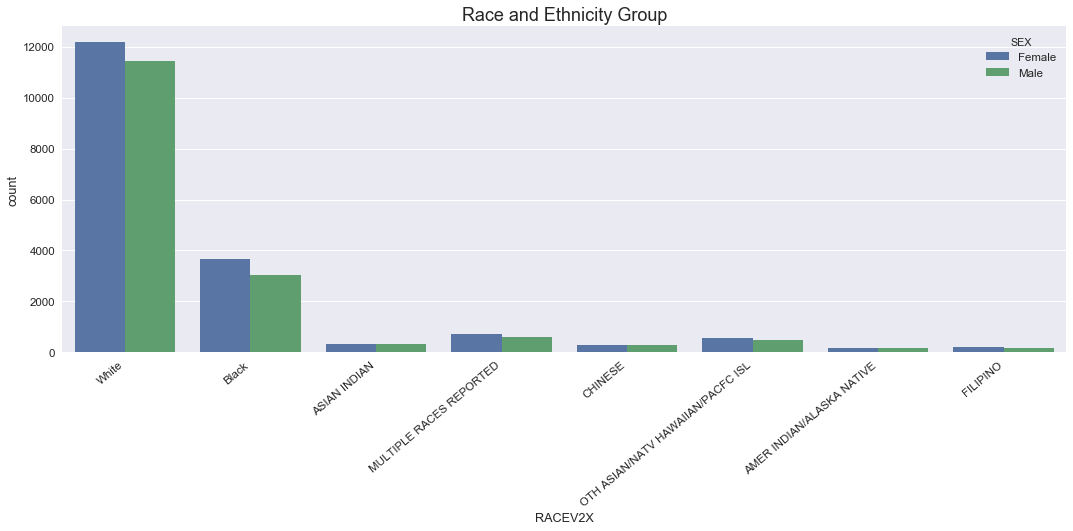

In [18]:
plt.figure(figsize=(18,6))
plt.title('Race and Ethnicity Group', fontsize=18)
ax = sns.countplot(x='RACEV2X',  hue='SEX',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Most of the population consists of White followed by Black.

Now, let's look at the different reqion our RU's are from

### Region

In [19]:
#Region
Region = df.groupby(['REGION16']).count()['RACEV2X']
Region_Count = Region.sort_values(axis=0, ascending=False)
Region_Count

REGION16
SOUTH           13123
WEST             9267
MIDWEST          6588
NORTHEAST        5421
INAPPLICABLE      256
Name: RACEV2X, dtype: int64

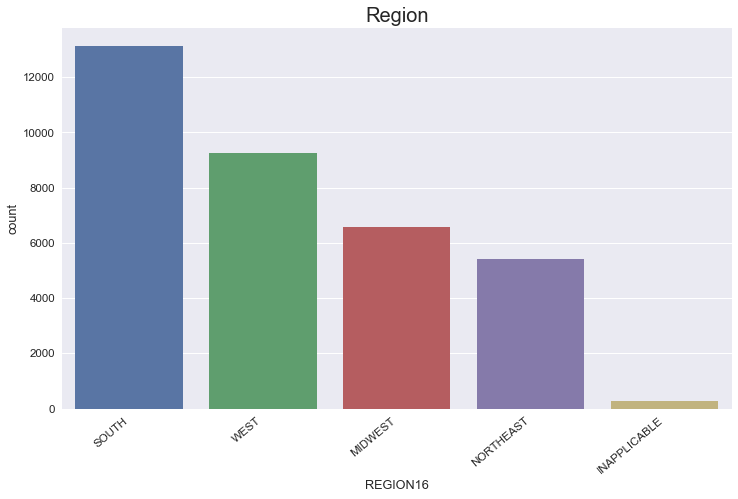

In [20]:
plt.figure(figsize=(12,7))
plt.title('Region', fontsize=20)
ax=sns.countplot(x='REGION16',data=df,  order=pd.value_counts(df['REGION16']).iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

We observe that large population of the RU are from South. It makes sense, as MEPS have not only allocated traditional southern states but some of the easter/mid western states like DC, Maryland, Kentucky etc. (South states include Alabama, Arkansas, Delaware, District of Columbia, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, Oklahoma, South Carolina, Tennessee, Texas, Virginia, and West Virginia).

This is followed by West and Mid-west. There is a small number (~256) marked as Inapplicable


### Health insurance

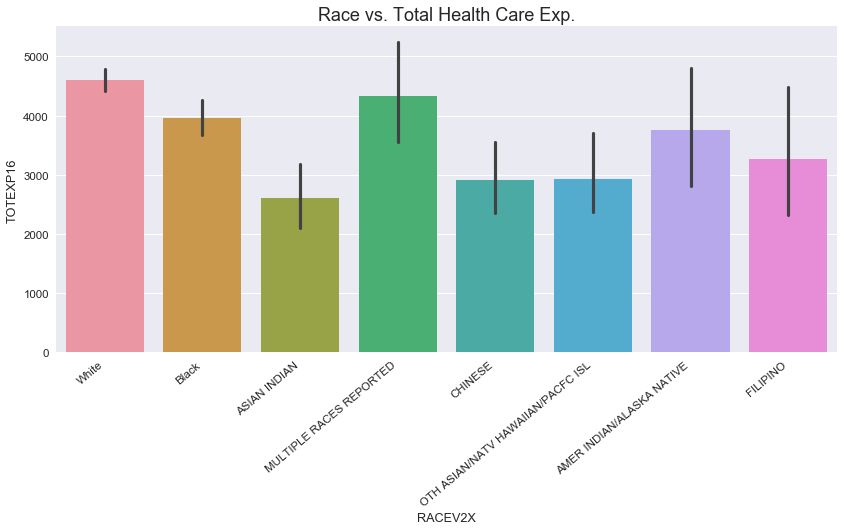

In [21]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x='RACEV2X', data=df, y='TOTEXP16')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Race vs. Total Health Care Exp.', fontsize=18)
plt.show()

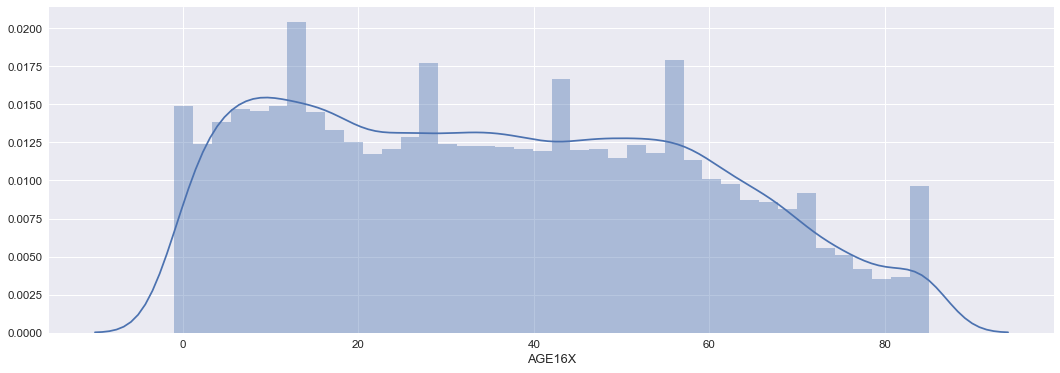

In [22]:
plt.figure(figsize=(18,6))
sns.distplot(df.AGE16X, bins = 40) 

Age is not normally distributed. From the documentation, we know that when age was not accounted for, it was imputed using: 

1.  The mean age difference between MEPS participants with certain family relationships
(where available) or 
2. The mean age value for MEPS participants. 

Now, let's check Age across different Races to have an understanding of distribution. We will use Box Plot for this purpose

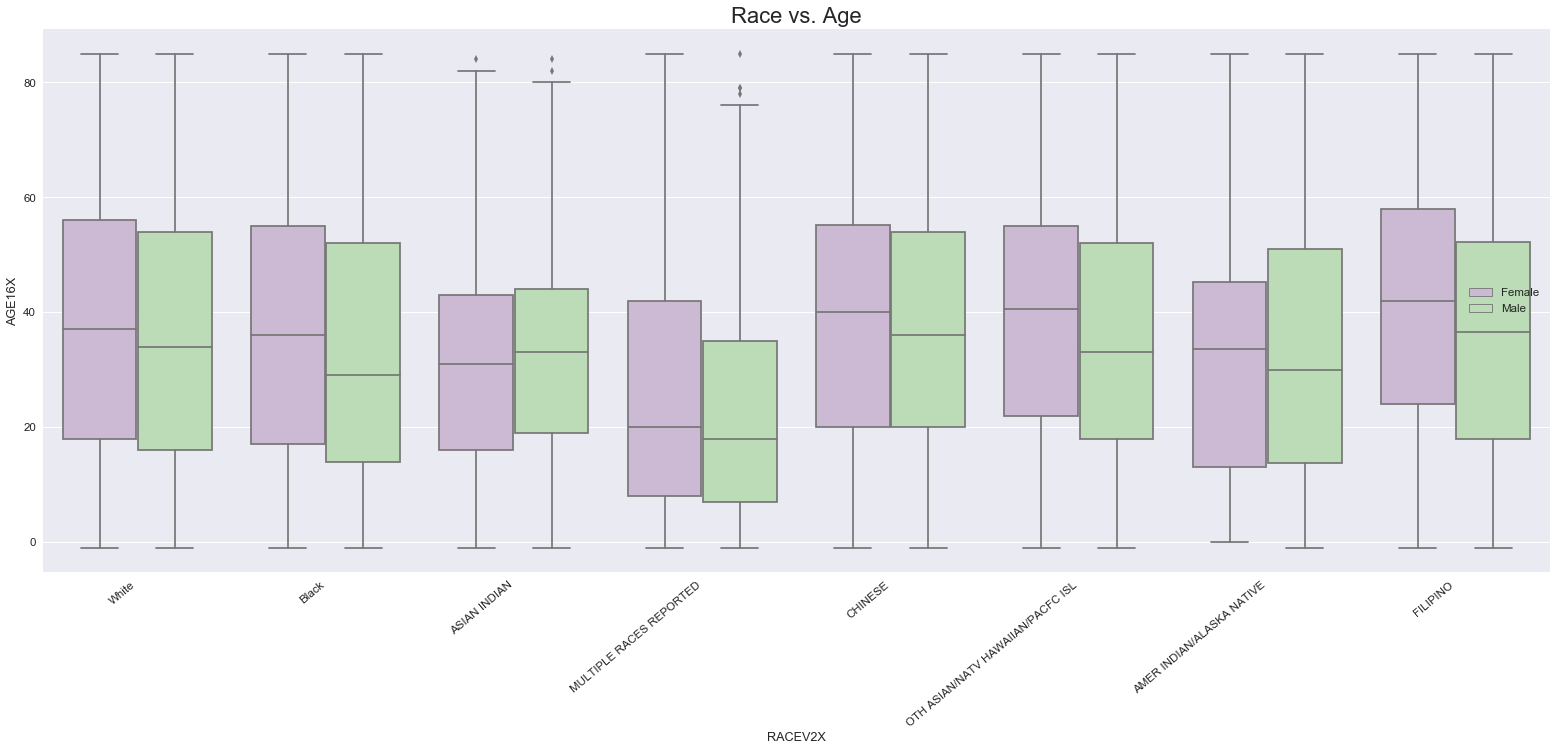

In [23]:
plt.figure(figsize=(27,10))
ax = sns.boxplot(x="RACEV2X", y="AGE16X", hue="SEX", data=df, palette="PRGn")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Race vs. Age', fontsize=22)
plt.legend()
plt.show()

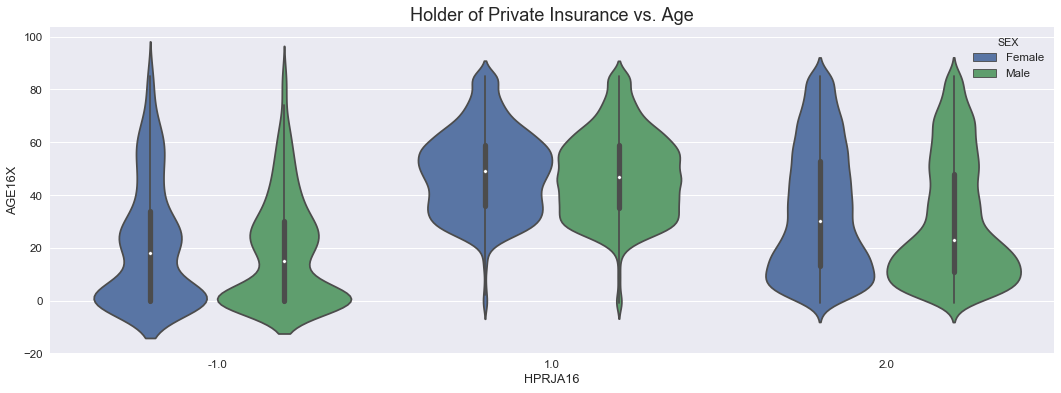

In [24]:
plt.figure(figsize=(18,6))
sns.violinplot(x='HPRJA16', y='AGE16X', hue = 'SEX', data=df)
plt.title('Holder of Private Insurance vs. Age', fontsize=18)

Inference: On an average, older people have Private Insurance. Younger lot doesn't. 

Let's confirm this inference and check the distribution across different Races

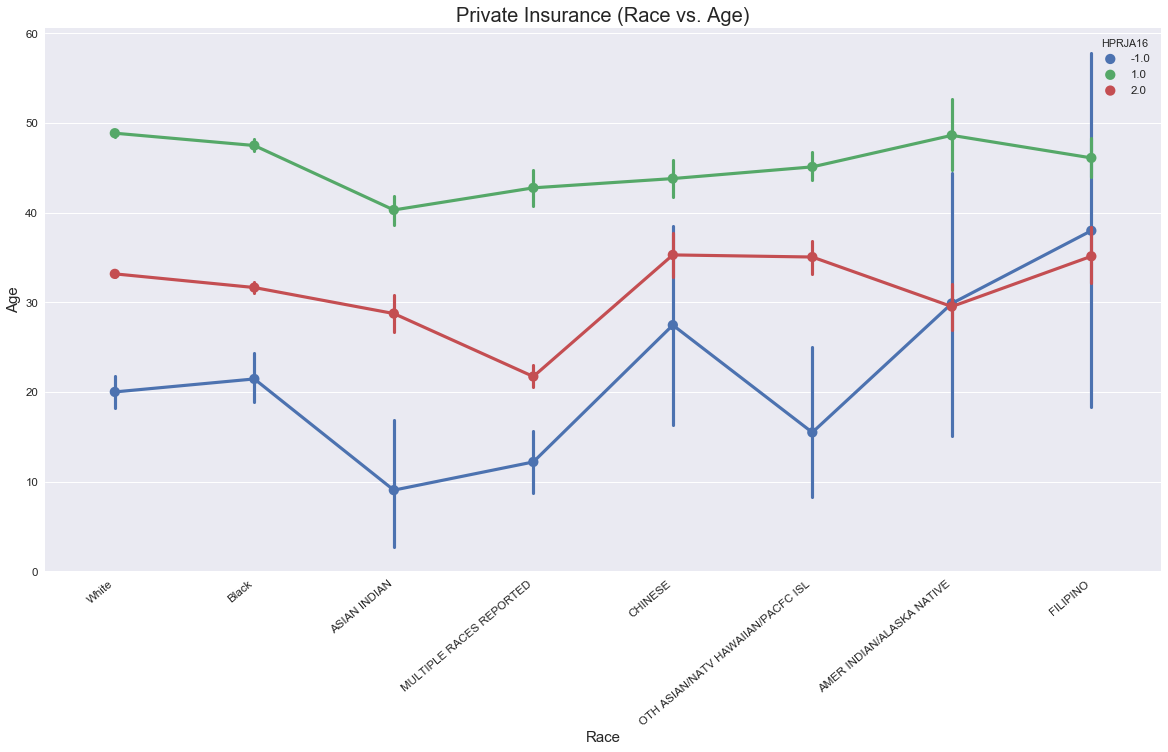

In [25]:
f,ax1 = plt.subplots(figsize =(20,10))
ax=sns.pointplot(x='RACEV2X', y='AGE16X',hue='HPRJA16',data=df)
plt.xlabel('Race',fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.ylabel('Age',fontsize = 15)
plt.title('Private Insurance (Race vs. Age)',fontsize = 20)
plt.show()

On an average, younger people across different Races do not have Private Insurance. Specially, the ones who identified has'Multiple races' and 'American Indian/Alaska Native'


# <a id='5'>5. Model </a>


## Principal Component Analysis (PCA)


Principal component analysis (PCA) is unsupervised statistical technique used to examine the interrelations among a set of variables in order to identify the underlying structure of those variables. 

It uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. If there are {\displaystyle n} n observations with {\displaystyle p} p variables, then the number of distinct principal components is {\displaystyle \min(n-1,p)} {\displaystyle \min(n-1,p)}. 

This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

In [26]:
#Importing the dataset
#Loading the raw-data again 

with open('h192.ssp', 'rb') as f:
    data = xport.to_dataframe(f)

In [27]:
# Dropping Columns

df = data[['DUPERSID','SEX', 'RACEV2X', 'PERWT16F', 'AGE16X', 'HPRJA16', 'TOTEXP16', 'REGION16' ]]

In [28]:
# Principal Component Analysis

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaler_data = scaler.transform(df)

In [30]:
from sklearn.decomposition import PCA #Decomposing 

In [31]:
# Let's specify 2 components

pca = PCA(n_components=2) #Linear dimensionality reduction using Singular Value Decomposition 

In [32]:
pca.fit(scaler_data) #

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

explained variance ratio: [ 0.16573959  0.13663467]


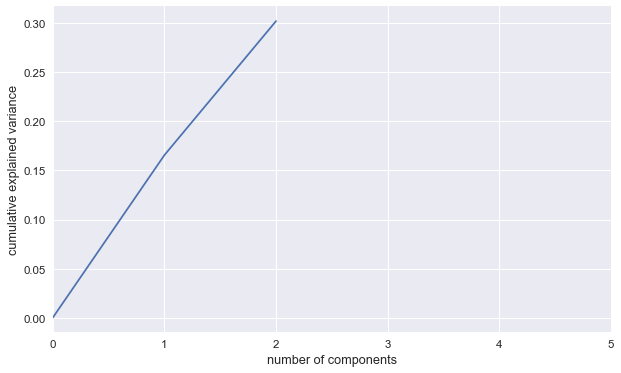

In [33]:
#Visualize components

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(10,6))
plt.plot(np.r_[[0],np.cumsum(pca.explained_variance_ratio_)])
plt.xlim(0,5)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [34]:
x_pca = pca.transform(scaler_data)

In [35]:
x_pca.shape

(34655, 2)

Notice that we started with 12 features and we converted them into 2

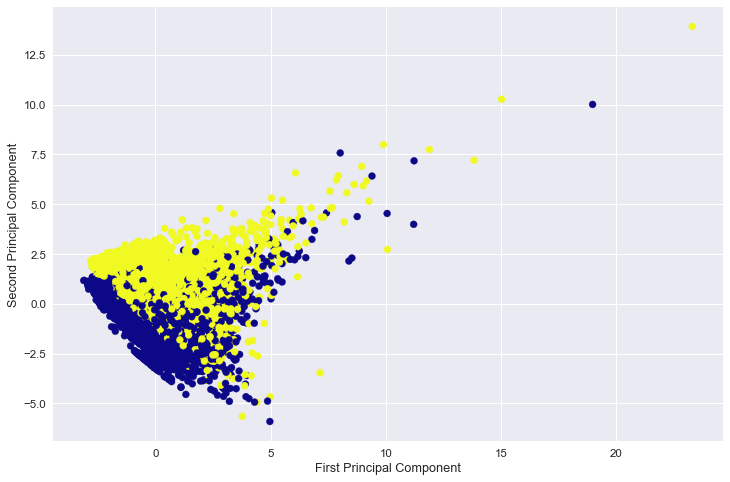

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['SEX'],cmap='plasma') # Scatter plot of the two columns. Hue as 'SEX'
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

We added hue as 'SEX' to check if there is any difference and it seems there is a bit of separation, although not signficant. It is important to note that this is using just 2 PCA components, instead of 1900+ from our raw data. These two components really correspond to combination of the features. These components are actually stored as attributes of the PCA. 

In [37]:
pca.components_ # array of actual components

array([[ 0.00807164,  0.08278045, -0.29537648,  0.41738195,  0.60431991,
        -0.22175809,  0.51606789, -0.2256591 ],
       [ 0.01059862,  0.5664628 ,  0.31969455, -0.40763863,  0.27924344,
         0.1051746 ,  0.33871565,  0.45482615]])

In [38]:
df_comp = pd.DataFrame(pca.components_)
df_comp

,0,1,2,3,4,5,6,7
0,0.008072,0.082780,-0.295376,0.417382,0.604320,-0.221758,0.516068,-0.225659
1,0.010599,0.566463,0.319695,-0.407639,0.279243,0.105175,0.338716,0.454826


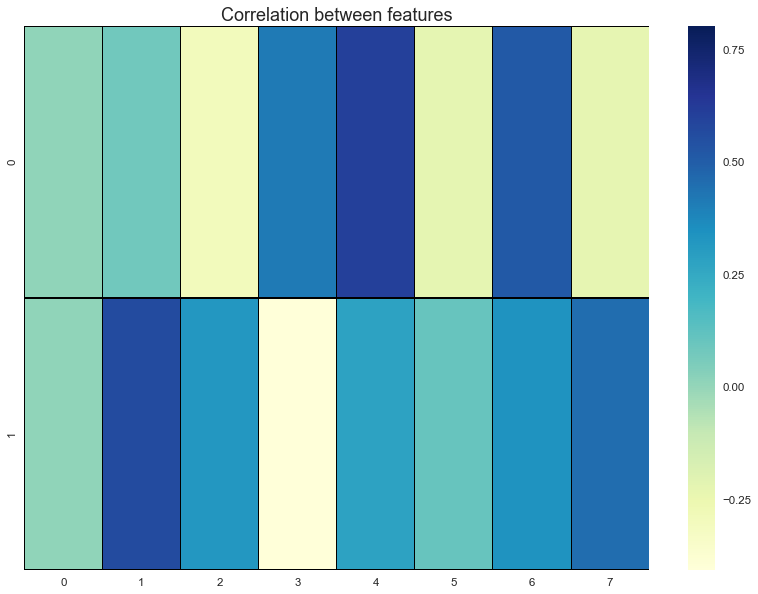

In [39]:
#Visualize the correlation using heatmap 

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.heatmap(df_comp, vmax=.8,linewidths=0.01, cmap='YlGnBu', linecolor="black")
#ax.set_xticklabels(df_comp.df_comp.values[::-1])
plt.title('Correlation between features', fontsize=18);

# K-means clustering


In this section we are going to execute the k-means algorithm and analyze the main components that the function returns.

K-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

To determine the right amount of clusters, we will use 'Elbow Method'. The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

In [40]:
df_knn = df.as_matrix(columns= ['SEX', 'RACEV2X', 'PERWT16F', 'AGE16X', 'HPRJA16', 'TOTEXP16', 'REGION16'])

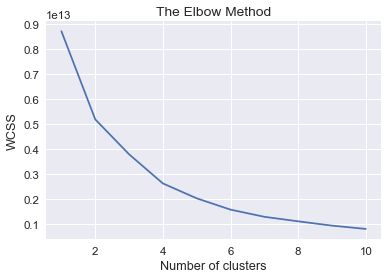

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_knn)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, it is pretty clear to use 5 clusters for our analysis. 

Let's create the apply K means and visualize our results!

In [42]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_knn) #Use fit_predict

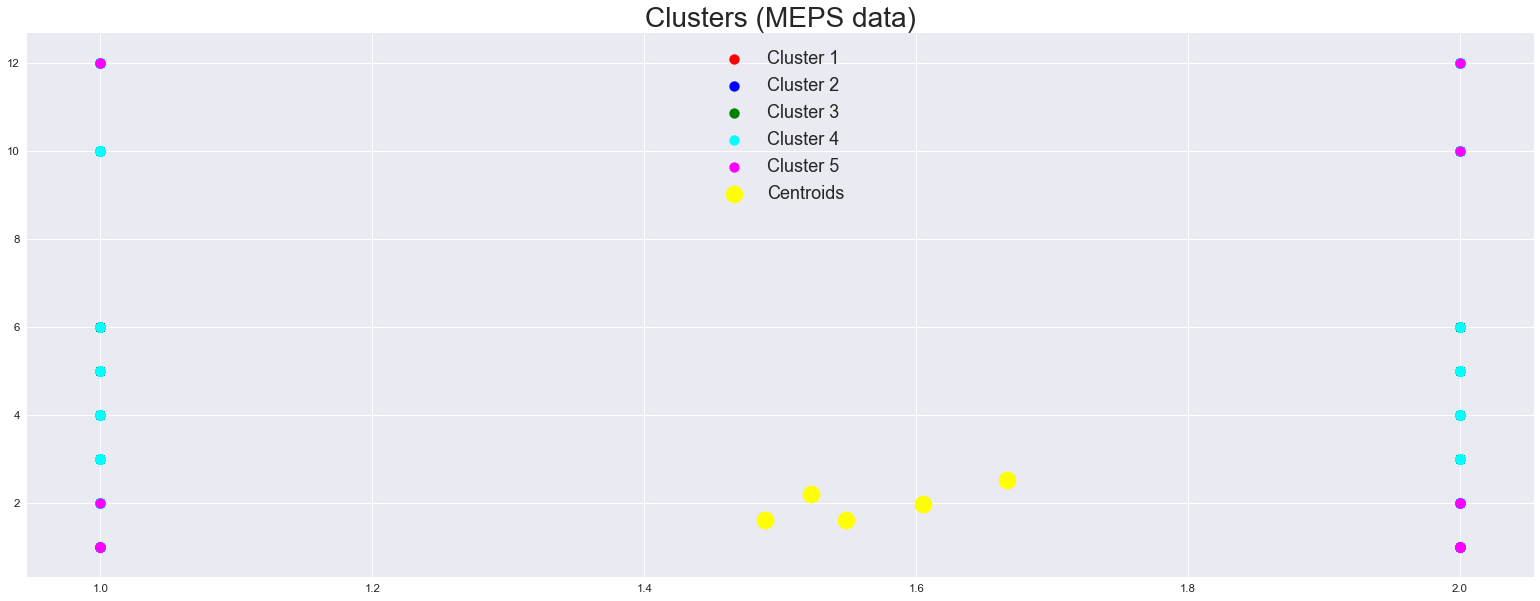

In [43]:
plt.figure(figsize=(27,10))

plt.scatter(df_knn[y_kmeans == 0, 0], df_knn[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_knn[y_kmeans == 1, 0], df_knn[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_knn[y_kmeans == 2, 0], df_knn[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df_knn[y_kmeans == 3, 0], df_knn[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df_knn[y_kmeans == 4, 0], df_knn[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters (MEPS data)', fontsize=28)
plt.legend(fontsize=18)
plt.show()

# Conclusion 


We analyzed 2016 data and the dataset included vast amount of features

- Older people tend to have Private Insurance across different Races
- Younger people from minority groups are less likely to have Private Insurance
- Women are more likely to be diagnosed with Priority conditions and need more coverage
- Person's age is correlated to Healthcare expenditure (However, correlation does not automatically imply causation)
- Asian Indian have the lease Healthcare expenditure. 
- Examining changes over longer periods of time can provide a more complete picture of underlying trends. 
- Large shifts in survey estimates over short periods of time (e.g. from one year to the next) that are
statistically significant should be interpreted with caution 
- Due to multiple rounds and changing public policies, economic conditions and survey methodologies, changes to the MEPS survey instrument should also be considered when analyzing trends.
-  Statistical techniques to smooth or stabilize analyses of trends using MEPS data such as comparing pooled time periods (e.g. 1996-97 versus 2011-12)

### Additional model -  Hierarchy Clustering



Hierarchical clustering is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other (Code is commented in order to save memory)

In [44]:
#df_hc = df.as_matrix(columns= ['SEX', 'RACEV2X', 'PERWT16F', 'AGE16X', 'HPRJA16', 'TOTEXP16', 'REGION16'])
#import scipy.cluster.hierarchy as sch
#plt.figure(figsize=(27,10))
#dendrogram = sch.dendrogram(sch.linkage(df_hc, method = 'ward'))
#plt.title('Dendrogram')
#plt.xlabel('Reporting Unit')
#plt.ylabel('Euclidean distances')
#plt.show()

In [45]:
# Fitting Hierarchical Clustering to the dataset

#from sklearn.cluster import AgglomerativeClustering
#hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
#y_hc = hc.fit_predict(df_hc)

In [46]:
# Visualising the clusters


#plt.scatter(df_hc[y_hc == 0, 0], df_hc[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
#plt.scatter(df_hc[y_hc == 1, 0], df_hc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(df_hc[y_hc == 2, 0], df_hc[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(df_hc[y_hc == 3, 0], df_hc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(df_hc[y_hc == 4, 0], df_hc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.title('Clusters of customers')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
#plt.legend()
#plt.show()